<a href="https://colab.research.google.com/github/aditya002ai/MachineLearningProjects/blob/main/Stroke_Patients_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Stroke Prediction usining ML algorithm

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


**Exploratory Data Analysis**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Lets fill null values

In [21]:
data['bmi'].value_counts()

28.7    41
28.4    38
26.7    37
27.7    37
26.1    37
        ..
13.9     1
49.9     1
40.6     1
52.3     1
44.1     1
Name: bmi, Length: 418, dtype: int64

In [22]:
data['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [9]:
data['bmi'].fillna(data['bmi'].mean(),inplace=True)


In [25]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [8]:
data.drop('id', axis=1,inplace=True)

In [27]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


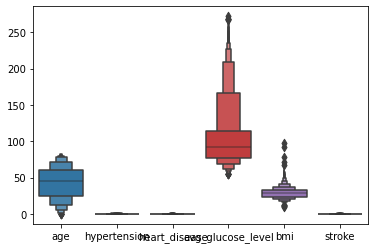

In [10]:
# outlier Remove
sns.boxenplot(data=data, orient='v ')

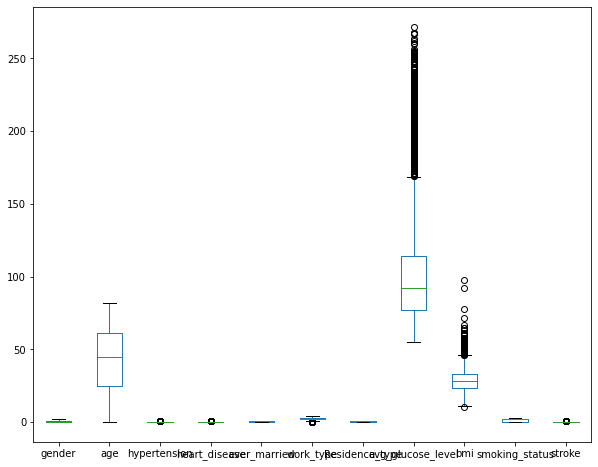

In [101]:
plt.rcParams['figure.figsize'] = (10,8)
data.plot(kind='box')
plt.show()

In [32]:
data['avg_glucose_level'].describe()


count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

In [12]:
data[data['avg_glucose_level']>114.090000]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5071,Male,81.0,0,0,Yes,Private,Rural,135.32,35.800000,Unknown,0
5076,Female,34.0,0,0,Yes,Private,Rural,174.37,23.000000,never smoked,0
5086,Female,51.0,0,0,Yes,Private,Urban,152.56,21.800000,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0


**Label Encoding**

In [32]:
data['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [33]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [34]:
gender = enc.fit_transform(data['gender'])
smoking_status = enc.fit_transform(data['smoking_status'])
work_type = enc.fit_transform(data['work_type'])
residence_type = enc.fit_transform(data['Residence_type'])
ever_married = enc.fit_transform(data['ever_married'])
residence_type

array([1, 0, 0, ..., 0, 0, 1])

In [35]:
data['work_type']=work_type
data['gender'] = gender
data['smoking_status'] = smoking_status
data['Residence_type']= residence_type
data['ever_married']= ever_married


In [36]:
data.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   int64  
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int64  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 439.3 KB


**Partitioning**
 Spliting the data for train and test
 x-- featurs or independent variable  train_x, test_x  80/20
 y -- target variable or dependent variable tain_Y, test_Y

In [38]:
X = data.drop('stroke', axis=1)
Y= data['stroke']
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=101)
X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3831,0,55.0,0,0,0,3,0,67.10,31.400000,2
5085,0,72.0,0,0,1,2,1,83.89,33.100000,1
1593,1,31.0,0,0,1,2,1,71.31,25.800000,2
1324,0,80.0,0,0,1,0,1,84.86,28.893237,0
123,1,56.0,1,0,1,2,0,249.31,35.800000,2
...,...,...,...,...,...,...,...,...,...,...
4171,1,45.0,0,0,1,2,1,115.52,33.900000,1
599,0,59.0,1,0,1,2,1,204.86,30.800000,2
1361,0,59.0,0,0,1,2,1,89.96,28.100000,0
1547,1,59.0,0,1,1,3,0,194.98,30.400000,0


In [29]:
X_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
5031,Female,20.0,0,0,No,Private,Rural,117.59,17.1,never smoked
4017,Female,44.0,0,0,Yes,Private,Rural,110.41,30.5,smokes
744,Female,71.0,1,0,Yes,Private,Urban,194.62,31.6,never smoked
1799,Male,34.0,0,0,Yes,Private,Urban,108.12,22.2,Unknown
2314,Male,82.0,0,0,Yes,Private,Urban,89.83,24.7,smokes
...,...,...,...,...,...,...,...,...,...,...
4795,Male,62.0,0,0,Yes,Self-employed,Rural,136.18,32.2,Unknown
4641,Female,45.0,0,0,Yes,Govt_job,Rural,84.99,35.4,Unknown
1320,Female,58.0,0,1,Yes,Private,Rural,144.16,26.0,smokes
1098,Female,77.0,0,0,Yes,Private,Rural,75.06,22.0,Unknown


In [39]:
# Normalization
data.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.414286,43.226614,0.097456,0.054012,0.656164,2.167710,0.508023,106.147677,28.893237,1.376908,0.048728
std,0.493044,22.612647,0.296607,0.226063,0.475034,1.090293,0.499985,45.283560,7.698018,1.071534,0.215320
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.245000,23.800000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.885000,28.400000,2.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.090000,32.800000,2.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


In [40]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)
X_train_std

array([[-0.83822764,  0.52508975, -0.32887595, ..., -0.86380214,
         0.32750249,  0.58675012],
       [-0.83822764,  1.27625065, -0.32887595, ..., -0.49693827,
         0.5478543 , -0.34367443],
       [ 1.19059095, -0.53537271, -0.32887595, ..., -0.77181304,
        -0.39836227,  0.58675012],
       ...,
       [-0.83822764,  0.70183349, -0.32887595, ..., -0.36430791,
        -0.10023924, -1.27409897],
       [ 1.19059095,  0.70183349, -0.32887595, ...,  1.93039389,
         0.19788379, -1.27409897],
       [-0.83822764,  0.30416007, -0.32887595, ..., -0.96147227,
        -0.70944717,  0.58675012]])

**Traning**
1.***Decision Tree***

In [24]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()


In [78]:
dt.fit(X_train_std,Y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [71]:
dt.feature_importances_

array([0.02678724, 0.15952738, 0.03697093, 0.02760084, 0.01312776,
       0.03334017, 0.05476392, 0.34219295, 0.25089802, 0.0547908 ])

In [72]:
X_train.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [73]:
Y_pred = dt.predict(X_test_std)

In [74]:
Y_test

5031    0
4017    0
744     0
1799    0
2314    0
       ..
4795    0
4641    0
1320    0
1098    0
4634    0
Name: stroke, Length: 1022, dtype: int64

In [76]:
from sklearn.metrics import accuracy_score
ac_dt = accuracy_score(Y_test,Y_pred)
ac_dt

0.9471624266144814

***Logistic Regression***

In [55]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_std,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
Y_pred = lr.predict(X_test_std)
Y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [63]:
ac_lr = accuracy_score(Y_test,Y_pred)
ac_lr

0.9471624266144814

***KNN  - K Nearest Neighbour***

In [64]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [65]:
knn.fit(X_train_std,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [67]:
Y_pred = knn.predict(X_test_std)
Y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [69]:
ac_knn = accuracy_score(Y_test,Y_pred)
ac_knn

0.9452054794520548

***Random Forest***

In [86]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_std,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [87]:
Y_pred = rf.predict(X_test)
Y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [88]:
ac_rf = accuracy_score(Y_test, Y_pred)
ac_rf

0.9471624266144814

***SVM - support vector machine***

In [93]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(X_train_std,Y_train)
Y_pred = sv.predict(X_test_std)
ac_sv = accuracy_score(Y_test,Y_pred)
ac_sv



0.9471624266144814

<BarContainer object of 5 artists>

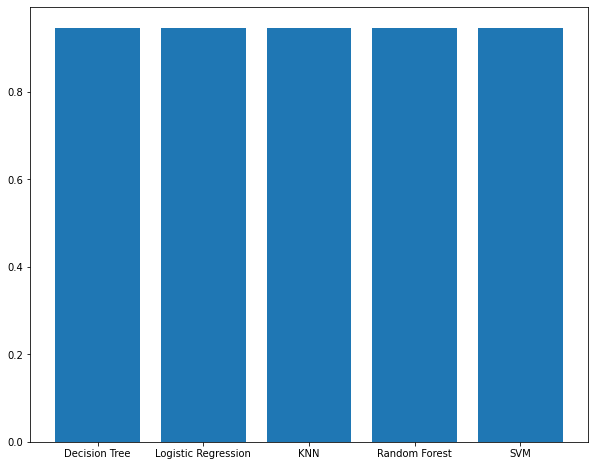

In [102]:
plt.bar(['Decision Tree', 'Logistic Regression','KNN','Random Forest','SVM'],[ac_dt,ac_lr,ac_knn,ac_rf,ac_sv])

In [104]:
import pickle
filename = 'strokePatientPrediction.sav'
pickle.dump(lr,open(filename,'wb'))